## UNEMPLOYEMENT IN INDIA

### Libraries import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data collection

In [105]:
df = pd.read_csv('data/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [106]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### DATA CLEANING

In [107]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [108]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64

In [109]:
# drop rows with any NaN values
df.dropna(inplace=True)
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

In [110]:
df.size

5180

In [111]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated_Unemployment_Rate_(%)            float64
Estimated_Employed                         float64
Estimated_Labour_Participation_Rate_(%)    float64
Area                                        object
dtype: object

In [112]:
# Remove leading and trailing spaces from string columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [113]:
# converting the object dtype 'Date' to datetime (format='%d-%m-%Y')
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors='coerce')

In [114]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated_Unemployment_Rate_(%)                   float64
Estimated_Employed                                float64
Estimated_Labour_Participation_Rate_(%)           float64
Area                                               object
dtype: object

## EDA

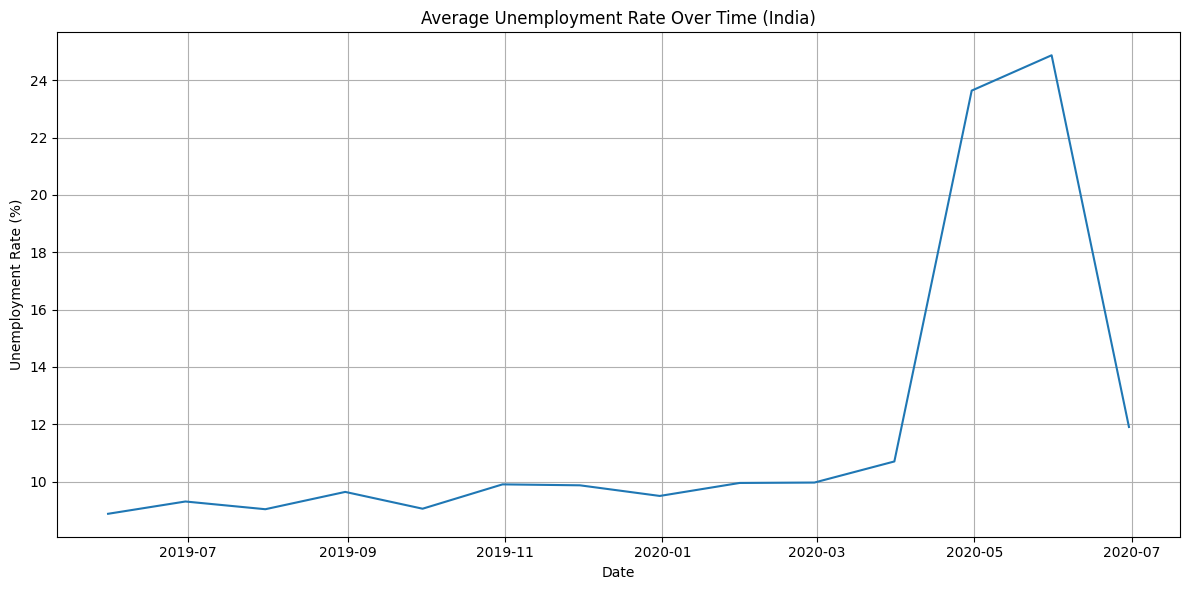

In [115]:
# Growth of Unemployment Rates with time
national_trend = df.groupby("Date")["Estimated_Unemployment_Rate_(%)"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=national_trend.index, y=national_trend.values)
plt.title("Average Unemployment Rate Over Time (India)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig('Output/unemployment_trend.png', dpi=300, bbox_inches='tight')
plt.show()


<strong>This Averare Unemployement Rate Over Time graph shows the following obersvations:</strong>
<ul>
    <li>There is a spike in unemployement rates around April-May 2020.</li>
    <li>THis sharp rise signs the economic disruption due to the pandemic.</li>
    <li>After May 2020, unemployment drops sharply, suggesting a gradual recovery or adjustment.</li>
    <li>This signifies the immidiate impact on jobs in India.</li>
</ul>

C:\Users\Anshuman Singh\AppData\Local\Temp\ipykernel_18472\1528633824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="viridis")


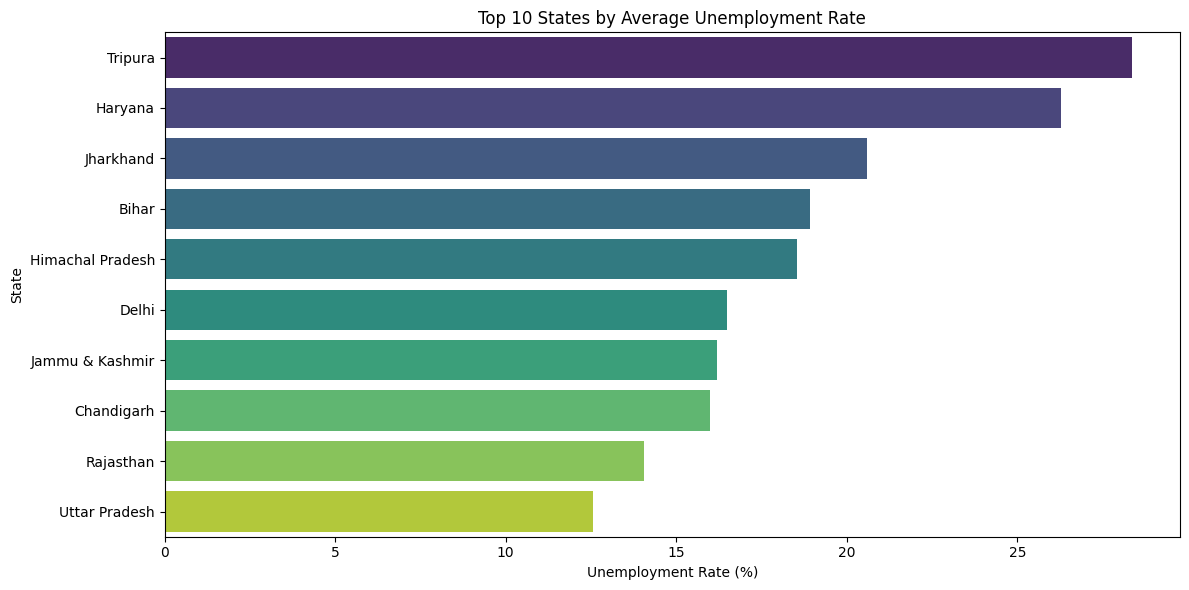

In [116]:
# State-wise Unemployment Rate (Top 10)
state_avg = df.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="viridis")
plt.title("Top 10 States by Average Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("Output/top_10_states_unemployment_rate.png", dpi=300, bbox_inches='tight')
plt.show()


<strong>Top 10 States by Average Unemployment Rate has the following insights:</strong>

<ul>
    <li>Tripura, Haryana, and Jharkhand faced the highest average unemployment.</li>
    <li>These states may need focused policy interventions or industrial boosts.</li>
    <li>States like UP and Rajasthan, though populous, have relatively lower rates in this list.</li>
</ul>

C:\Users\Anshuman Singh\AppData\Local\Temp\ipykernel_18472\2847109071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=area_avg.values, x=area_avg.index, palette='coolwarm')


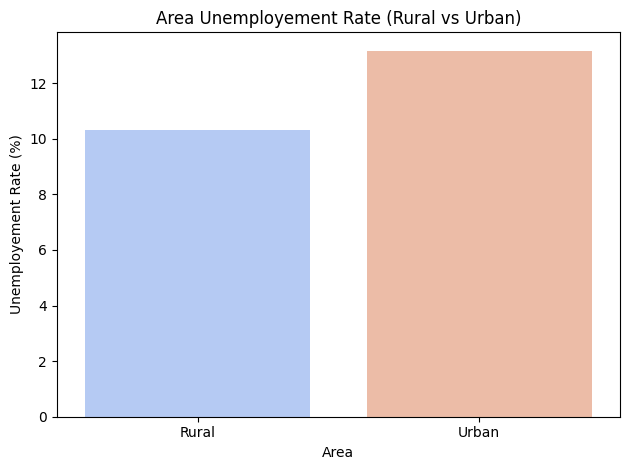

In [117]:
area_avg = df.groupby("Area")["Estimated_Unemployment_Rate_(%)"].mean()

plt.Figure((12, 9))
sns.barplot(y=area_avg.values, x=area_avg.index, palette='coolwarm')
plt.title("Area Unemployement Rate (Rural vs Urban)")
plt.ylabel("Unemployement Rate (%)")
plt.tight_layout()
plt.savefig("Output/area_unemployment_rate.png", dpi=300, bbox_inches='tight')
plt.show()

<strong>Area Unemployement Rate (Rural vs Urban) shows the following:</strong>

<ul>
    <li>Urban areas consistently show higher unemployment rates than rural areas.</li>
    <li>Which means urban based people were more affected by the pandemic than that of rural based people</li>
    <li>One of the possible reasons could be the stable agriculture employement in rural areas.</li>
</ul>

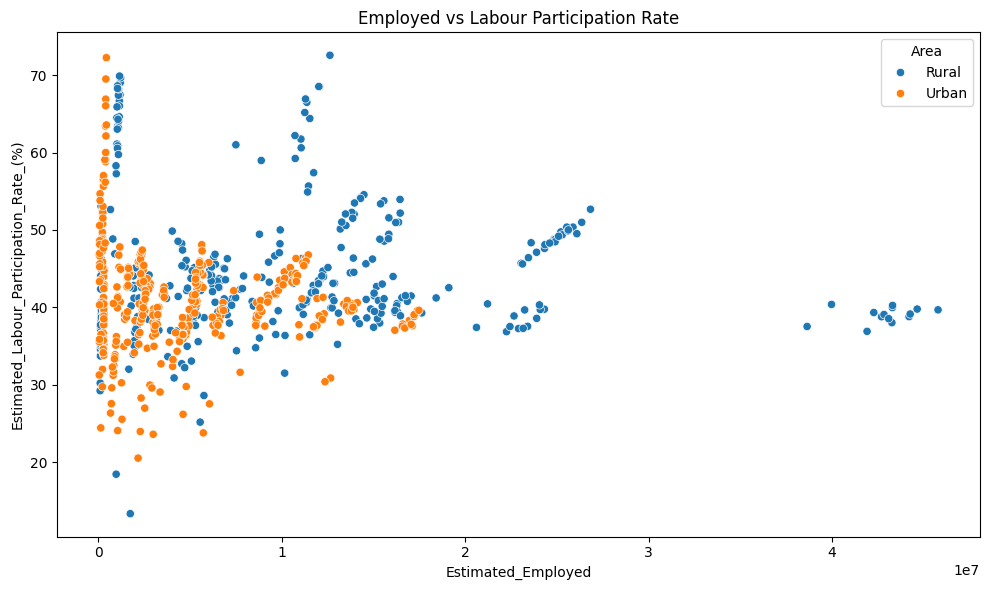

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Estimated_Employed", y="Estimated_Labour_Participation_Rate_(%)", hue="Area")
plt.title("Employed vs Labour Participation Rate")
plt.tight_layout()
plt.savefig("Output/employed_vs_labour_participation.png", dpi=300, bbox_inches='tight')
plt.show()

<strong>Employed vs Labour Participation (by Area)</strong>
<ul>
    <li>There's no strong linear pattern, but you can spot:</li>
    <ul>
        <li>Clusters of high labour participation but low employment (likely urban).</li>
        <li>Rural areas (blue) are more spread out, indicating varied engagement.</li>
    </ul>
    <li>Urban dots tend to cluster lower on both axes, hinting at lower employment and labour participation.</li>
    <li>There's a mismatch between labour participation and employment, possibly due to informal sector vulnerabilities.</li>
</ul>

13:27:14 - cmdstanpy - INFO - Chain [1] start processing
13:27:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Anshuman Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


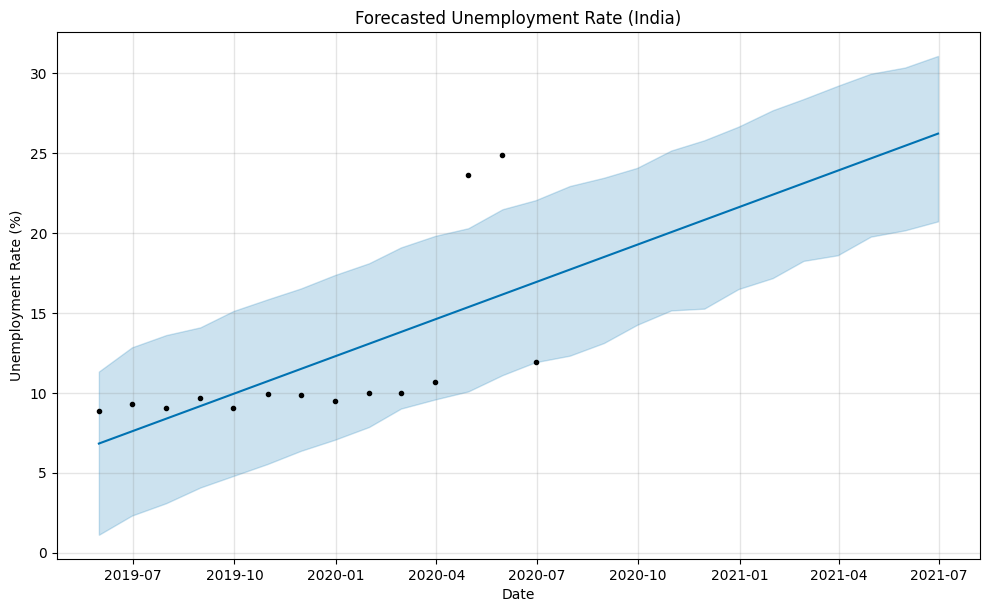

In [119]:
# using Prophet for forecasting the unemployment rate
from prophet import Prophet

# load the cleaned dataset
df = df.copy()


# Group by date to get national average unemployment rate per month
monthly_avg = df.groupby('Date')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# change the names of the columns to meet Prophet's requirements
monthly_avg.rename(columns={'Date': 'ds', 'Estimated_Unemployment_Rate_(%)': 'y'}, inplace=True)

# fit the model with Prophet
model = Prophet()
model.fit(monthly_avg)

# create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# forecast based on the model
forecast = model.predict(future)

# plot the forecast
model.plot(forecast)
plt.title('Forecasted Unemployment Rate (India)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.savefig('Output/unemployment_forecast.png', dpi=300, bbox_inches='tight')
plt.show()


## CREATING REPORT IN PDF FORMAT

In [139]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "BU", 14)
        self.cell(0, 15, "Unemployment Analysis Report", ln=True, align="C")
        self.ln(5)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.set_text_color(30, 30, 30)
        self.cell(0, 10, title, ln=True, align="C")
        self.ln(3)

    def chapter_body(self, text):
        self.set_font("Arial", "", 11)
        self.set_text_color(50, 50, 50)
        self.multi_cell(0, 8, text)
        self.ln()

    def add_plot(self, image_path, title=""):
        self.add_page()
        self.chapter_title(title)
        self.image(image_path, w=180)

In [134]:
# this function is created to overcome the issue of unsupported Unicode characters in fpdf as it uses Latin-1 encoding

def sanitize_text(text):
    """
    Replace unsupported Unicode characters with ASCII equivalents
    for compatibility with fpdf (which uses Latin-1 encoding).
    """
    replacements = {
        "–": "-",  
        "—": "-",  
        "“": "\"",
        "”": "\"",
        "‘": "'",
        "’": "'",
        "•": "-",
        "…": "...",
        " ": " ",
    }
    for wrong, right in replacements.items():
        text = text.replace(wrong, right)
    return text


In [140]:
import os

# Inferences from the analysis
inferences = [
    ("Unemployment Trend",
    """
        - There is a spike in unemployment rates around April–May 2020.
        - This sharp rise indicates the economic disruption due to the pandemic.
        - After May 2020, unemployment drops sharply, suggesting a gradual recovery or adjustment.
        - This signifies the immediate impact of the pandemic on jobs in India.
    """),

    ("Top 10 States by Unemployment Rate",
    """
        - Tripura, Haryana, and Jharkhand recorded the highest average unemployment rates.
        - These states may require targeted policy interventions or industrial support.
        - Despite their large populations, states like Uttar Pradesh and Rajasthan show relatively lower unemployment among the top 10.
    """),

    ("Rural vs Urban Unemployment Rate",
    """
        - Urban areas consistently show higher unemployment rates than rural areas.
        - This implies that urban populations were more affected by the pandemic than rural populations.
        - One possible reason could be the relative stability of agricultural employment in rural areas.
    """),

    ("Employed vs Labour Participation",
    """
        - There is no strong linear pattern, but notable trends can be observed:
            - Clusters of high labour participation but low employment — likely urban areas.
            - Rural areas (blue) show more spread, indicating diverse levels of engagement.
        - Urban data points tend to cluster lower on both axes, hinting at lower employment and participation.
        - This mismatch may be due to vulnerabilities in informal urban employment sectors.
    """),

    ("Forecasted Unemployment Rate",
    """
        - The unemployment rate is projected to rise steadily into 2021 before stabilizing.
        - The wide confidence interval suggests uncertainty in long-term recovery.
        - A major spike during early 2020 reflects pandemic-driven disruptions, but projections indicate gradual recovery.
    """)
]

# Create PDF
pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)

for (index, (title, text)) in enumerate(inferences):
    plot_file = f"Output/Plot{index+1}.png"
    if os.path.exists(plot_file):
        pdf.add_plot(plot_file, title)
        pdf.chapter_body(sanitize_text(text))
    else:
        print(f"Plot file '{plot_file}' does not exist. Skipping this section.")

# Save the PDF report
pdf.output("Output/Unemployment_Analysis_Report.pdf")
print("PDF report generated as: 'Unemployment_Analysis_Report.pdf'")

PDF report generated as: 'Unemployment_Analysis_Report.pdf'
